# Predicting Hotel Booking Cancellations
## Exploratory Data Analysis

### Table of Contents
* [1. Introduction](#1)
* [2. Hypothesis testing - Are the two hotels records similar?](#2)
    * [2.1 Hypothesis formulation](#21)
    * [2.2 Getting the distribution of the data](#22)
    * [2.3 Are these normal distributions?](#23)
    * [2.4 Permutation test](#24)
* [3. Feature analysis](#3)
    * [3.1 Heatmap](#31)
    * [3.2 Multivariate analysis  - Feature analysis versus canceled and confirmed subsets](#32)
    * [3.3 Temporal impact on bookings' ADR and lenght of stay](#33)
* [4. Why most of the customers with non refundable deposits are canceling their bookings?
](#4)
* [5. Conclusions](#5)

### 1. Introduction <a class="anchor" id="1"></a>

This is the second notebook of my **Predicting Hotel Booking Cancellations** project. Before moving on and discussing about what is the purpose of EDA and what steps I considered necessary in this exploration, let's have a quick recap of the first notebook, [Data Wrangling](Data_Wrangling.ipynb). 

* We started by describing the identified problem, using bookings data from 2 hotels with the final goal of predicting booking cancelations, but also with the intent of looking at a possible customer segmentation.

* Then we modified the features' names and data types and continued with data definition, where we described each feature from our data.

* Next we explored the numerical features with basic exploratory analysis and also had a quick look at outliers to make a decision if we are going to keep those records or not.

* After that we dove deeped into our exploratory analysis by ploting the categorical features versus our target feature **is_canceled** for a better understanding of our data.

* Finally we cleaned the data of missing values and saved it as **hotels_cleaned.csv**.


I believe that Exploratory Data Analysis(EDA) is one of the most important steps of the Data Science Method because of two main reasons. Firstly, an EDA done properly will tell the story of the data to everyone - from a scientist to a stakeholder or even a regular person without technical or domain knowledge. Secondly, EDA allows us to see patterns, create assumptions and test them as well. I've found one of the most complete definitions of EDA in [NIST/SEMATECH e-Handbook of Statistical Methods](http://www.itl.nist.gov/div898/handbook/).

>Exploratory Data Analysis (EDA) is an approach/philosophy
for data analysis that employs a variety of techniques (mostly
graphical) to
<br>1. maximize insight into a data set;
<br>2. uncover underlying structure;
<br>3. extract important variables;
<br>4. detect outliers and anomalies;
<br>5. test underlying assumptions;
<br>6. develop parsimonious models; and
<br>7. determine optimal factor settings.
<br><br>The EDA approach is precisely that--an approach--not a set of
techniques, but an attitude/philosophy about how a data
analysis should be carried out.

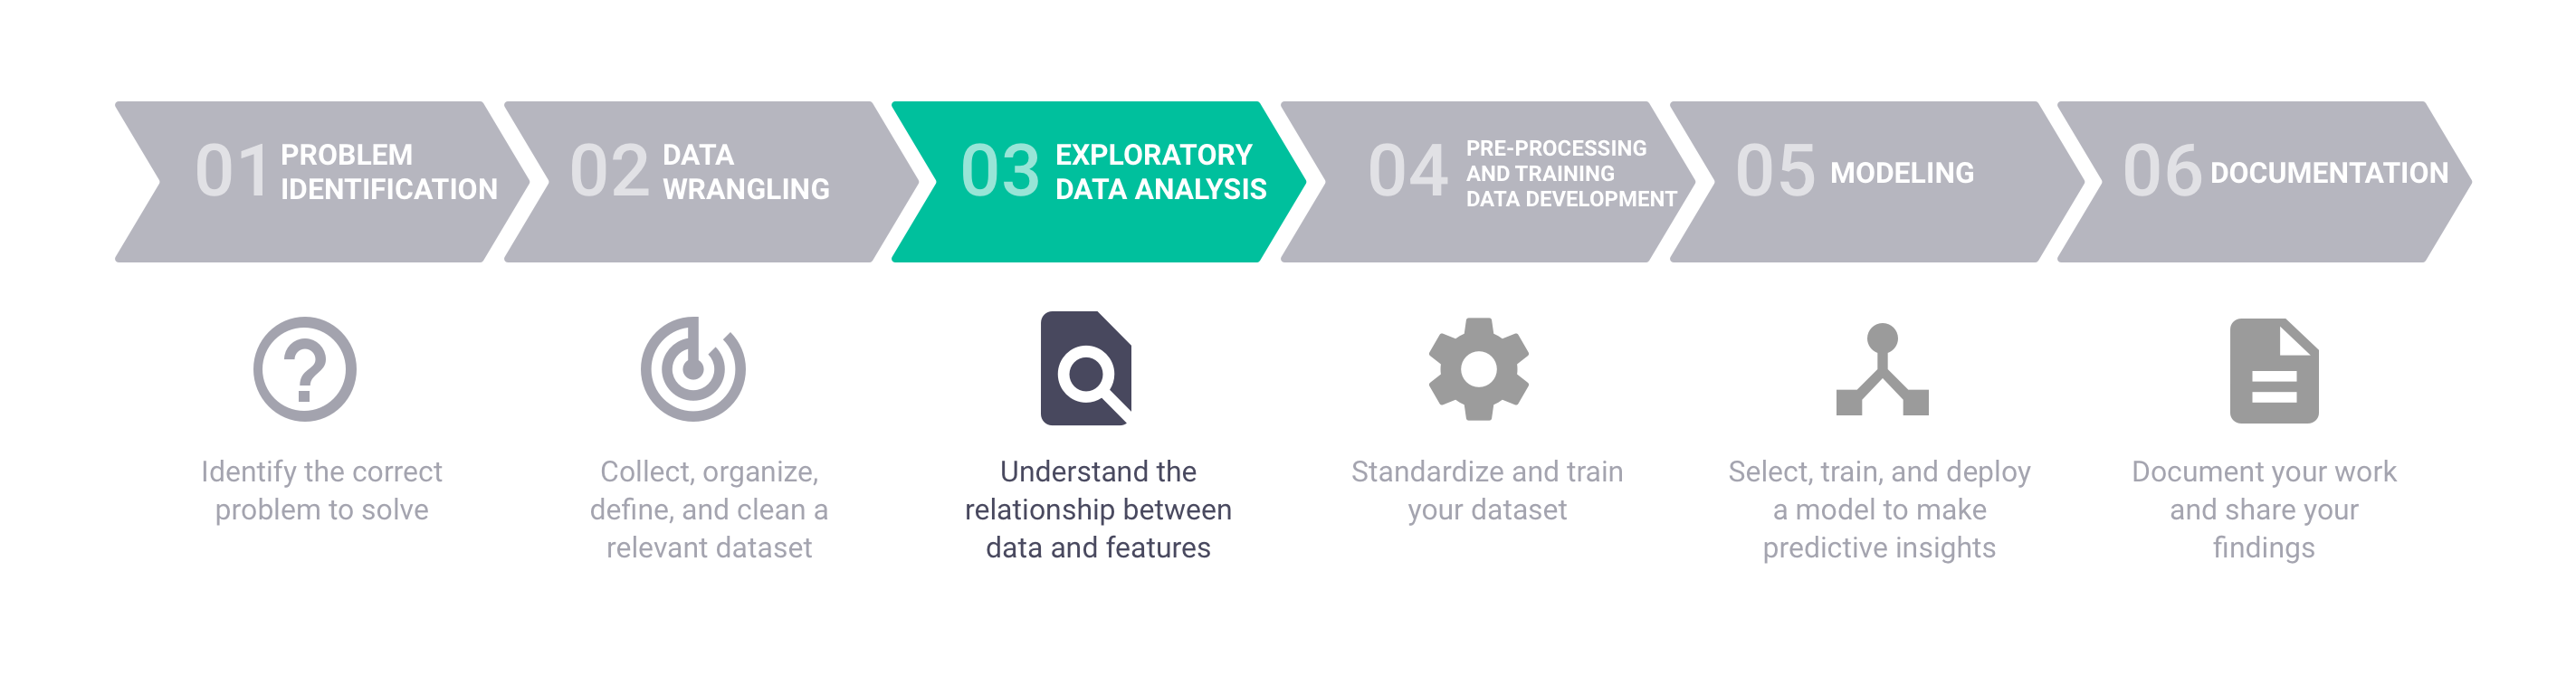

Because we started our data cleaning in the **Data Wrangling** section, we took take care of a few points from **EDA** in our initial exploration such as uncovering the structure of the dataset and detecting outliers and anomalies from our numerical features.


In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)
import seaborn as sns
sns.set_theme(style="whitegrid")

from scipy import stats
import random
np.random.seed(123)

In [2]:
#Loading the data from the 2 hotels
hotels = pd.read_csv('../data/interim/hotels_cleaned.csv', index_col = 0)
hotels.sample(5).T

,113047,62870,44658,19217,45222
hotel,Lisbon City Hotel,Lisbon City Hotel,Lisbon City Hotel,Algarve Resort Hotel,Lisbon City Hotel
is_canceled,0,1,0,1,1
lead_time,20,59,80,92,50
arrival_date_year,2017,2017,2015,2016,2015
arrival_date_month,May,January,October,February,October
arrival_date_week_number,22,4,41,9,43
arrival_date_day_of_month,30,23,9,26,24
stays_in_weekend_nights,0,1,0,1,0
stays_in_week_nights,3,1,2,2,1
adults,2,2,1,2,2


In [3]:
# Inspect categorical columns
hotels.describe(exclude=[np.number]).T

,count,unique,top,freq
hotel,119389,2,Lisbon City Hotel,79329
arrival_date_month,119389,12,August,13877
meal,119389,5,BB,92309
country,119389,178,PRT,48589
market_segment,119389,8,Online TA,56477
distribution_channel,119389,5,TA/TO,97869
reserved_room_type,119389,10,A,85993
assigned_room_type,119389,12,A,74052
deposit_type,119389,3,No Deposit,104641
agent,119389,9,Other,36636


In [4]:
# Inspect numerical columns
hotels.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119389.0,0.370411,0.482917,0.00,0.00,0.00,1.0,1.0
lead_time,119389.0,104.011994,106.863358,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119389.0,2016.156555,0.707479,2015.00,2016.00,2016.00,2017.0,2017.0
arrival_date_week_number,119389.0,27.165292,13.605134,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119389.0,15.798164,8.780826,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119389.0,0.927606,0.998614,0.00,0.00,1.00,2.0,19.0
stays_in_week_nights,119389.0,2.500314,1.908289,0.00,1.00,2.00,3.0,50.0
adults,119389.0,1.856402,0.579263,0.00,2.00,2.00,2.0,55.0
children,119389.0,0.103887,0.398557,0.00,0.00,0.00,0.0,10.0
babies,119389.0,0.007949,0.097437,0.00,0.00,0.00,0.0,10.0


>**We performed some exploration in the previous part of our project, but some questions still remain that we would like to explore in this notebook:
<br> 
<br> 1. Does the origin of the booking matter when it comes to Booking Cancelations? In other words, are there significant differences in bookings, and more specific in booking cancelations, coming from the Resort Hotel or from Lisbon Hotel?
<br>
<br> 2. With data being spread over 3 years, are there any trends that can be identified correlated to the year or the arrival?
<br>
<br> 3. Is a heatmap of our features going to reveal any unexpected correlations? 
<br>
<br> 4. In the previous notebook we identified that almost all customers(99.36%) who had a "No Refund"(full pay of the stay) decided to cancel their booking which seems very surprising. Are there other features that could explain this very high percentage?**


## 2.Hypothesis testing - Are the two hotels records similar? <a class="anchor" id="2"></a>


A first question that we have to consider from the beginning is how different are the 2 hotels? Is there a significant difference between the two so that we have to consider which records came from one or another, or can we ignore this fact and simply disregard the origin of these records and perhaps remove having the **hotel** feature entirely?

With this purpose in mind, to see if records from the 2 hotels are similar or not, we will conduct a **Hypothesis Testing** regarding the cancelations distribution of the two hotels.

### 2.1 Hypothesis formulation <a class="anchor" id="21"></a>

Our **Null hypothesis**:

- **H<sub>null</sub>**: the observed difference in the mean cancelations per day of Algarve Resort Hotel and Lisbon City Hotel is due to chance (and thus not due to the hotel).

The opposite hypothesis is the **Alternate hypothesis**:

- **H<sub>alternative</sub>**: the observed difference in the mean cancelations per day of Algarve Resort Hotel and Lisbon City Hotel is due to chance (and is actually due to the hotel)

We're also going to pick a **significance level** of 0.01 - A confidence level of **99%**. 

### 2.2 Getting the distribution of the data <a class="anchor" id="22"></a>

In order to check this hypothesis we will have to create a distribution for each hotel containing relevant indicators regarding booking cancelations.

At this moment we have a binomial feature **is_canceled** for each record from the hotels that does not help us to identify the needed distributions.

So as a first step of the Hypothesis Testing we will transform our data into a dataset containing **the percentage of bookings canceled per day for each of the two hotels**.

In [5]:
daily_bookin = hotels.groupby(by = ['hotel','arrival_date_year', 'arrival_date_month',
                                    'arrival_date_day_of_month' ])['is_canceled'].count()
daily_cancel = hotels.groupby(by = ['hotel','arrival_date_year', 'arrival_date_month',
                                    'arrival_date_day_of_month' ])['is_canceled'].sum()
daily_perc = (daily_cancel/daily_bookin*100).astype(int)
daily_perc

hotel                 arrival_date_year  arrival_date_month  arrival_date_day_of_month
Algarve Resort Hotel  2015               August              1                            41
                                                             2                            15
                                                             3                            17
                                                             4                            23
                                                             5                            22
                                                                                          ..
Lisbon City Hotel     2017               May                 27                           38
                                                             28                           46
                                                             29                           24
                                                             30             

In [6]:
daily_perc.describe()

count    1586.000000
mean       31.121059
std        17.024027
min         0.000000
25%        19.000000
50%        30.000000
75%        41.000000
max       100.000000
Name: is_canceled, dtype: float64

In [7]:
daily_perc.groupby(by = 'hotel').describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
Algarve Resort Hotel,793.0,24.791929,13.590264,0.0,15.0,24.0,33.0,82.0
Lisbon City Hotel,793.0,37.450189,17.750739,0.0,25.0,36.0,47.0,100.0


Text(0, 0.5, 'Daily cancelation percentages')

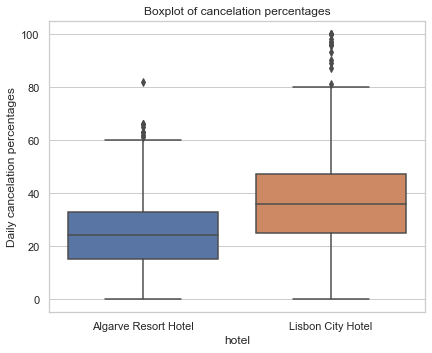

In [8]:
test_data = daily_perc.reset_index()
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(x = 'hotel', y = 'is_canceled', data = test_data)
plt.title('Boxplot of cancelation percentages')
plt.ylabel('Daily cancelation percentages')

We can see that the average percentage for the 2 hotels are different by quite a margin, the Lisbon City Hotel having **37.45%** daily cancelations on average while the Algarve Resort Hotel has only **24.79%**.

### 2.3 Are these normal distributions? <a class="anchor" id="23"></a>
Let's have a look at the two distributions while also checking to see if any of them are normal distributions using **stats.normaltest()**

In [9]:
# Using the stats.normaltest(), we will check for an indication of whether the Algarve_Resort data are normally distributed
Algarve_Resort = stats.normaltest(daily_perc['Algarve Resort Hotel'])
Algarve_Resort

NormaltestResult(statistic=31.00150109538724, pvalue=1.8539993253685236e-07)

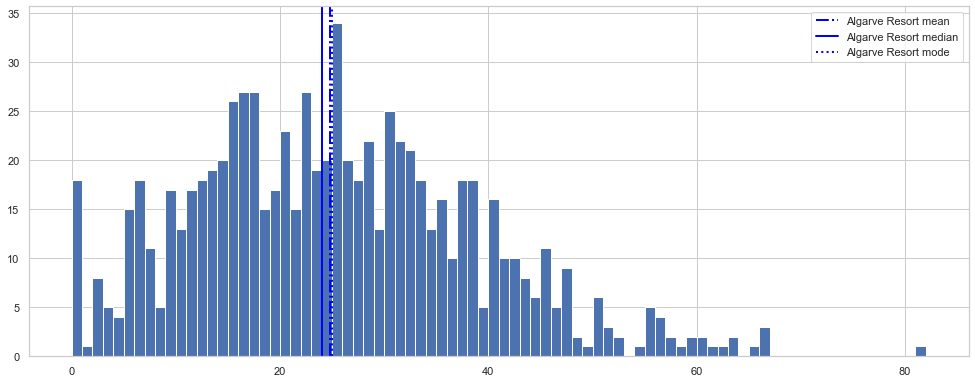

In [10]:
daily_perc['Algarve Resort Hotel'].hist(bins = 82)
plt.axvline(x=daily_perc['Algarve Resort Hotel'].mean(), color = 'blue', linewidth = 2, label = 'Algarve Resort mean', linestyle = '-.')
plt.axvline(x=daily_perc['Algarve Resort Hotel'].median(), color = 'blue', linewidth = 2, label = 'Algarve Resort median')
plt.axvline(x=daily_perc['Algarve Resort Hotel'].mode().iloc[0], color = 'blue', linewidth = 2, label = 'Algarve Resort mode', linestyle = ':')
plt.legend()

> We can see that this distribution is right skewed, having a tail on the right side, with small differences between mean, mode and median, but with a low **pvalue**, therefore we can say that this is not a normal distribution.

In [11]:
# Using the stats.normaltest(), we will check for an indication of whether the Lisbon_Hotel data are normally distributed
Lisbon_Hotel = stats.normaltest(daily_perc['Lisbon City Hotel'])
Lisbon_Hotel

NormaltestResult(statistic=77.32799228653873, pvalue=1.6159943076993227e-17)

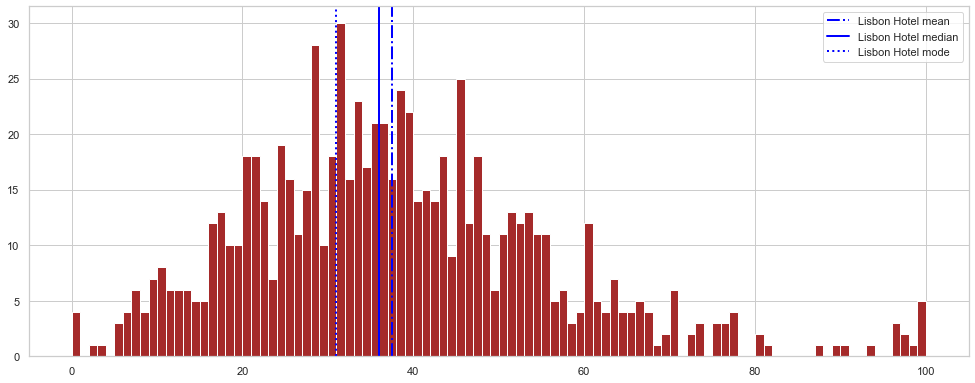

In [12]:
daily_perc['Lisbon City Hotel'].hist(bins = 100, color = 'brown')
plt.axvline(x=daily_perc['Lisbon City Hotel'].mean(), color = 'blue', linewidth = 2, label = 'Lisbon Hotel mean', linestyle = '-.')
plt.axvline(x=daily_perc['Lisbon City Hotel'].median(), color = 'blue', linewidth = 2, label = 'Lisbon Hotel median')
plt.axvline(x=daily_perc['Lisbon City Hotel'].mode().iloc[0], color = 'blue', linewidth = 2, label = 'Lisbon Hotel mode', linestyle = ':')
plt.legend()

> We can see that this distribution is as well right skewed with considerable differences between mean, mode and median, and with a very low **pvalue**, therefore we can confidently say that this is not a normal distribution either.

> We will also plot the two distributions on the same **x** scale to see the differences better.

Text(0.5, 1.0, 'Distribution of the cancelation percentages with means')

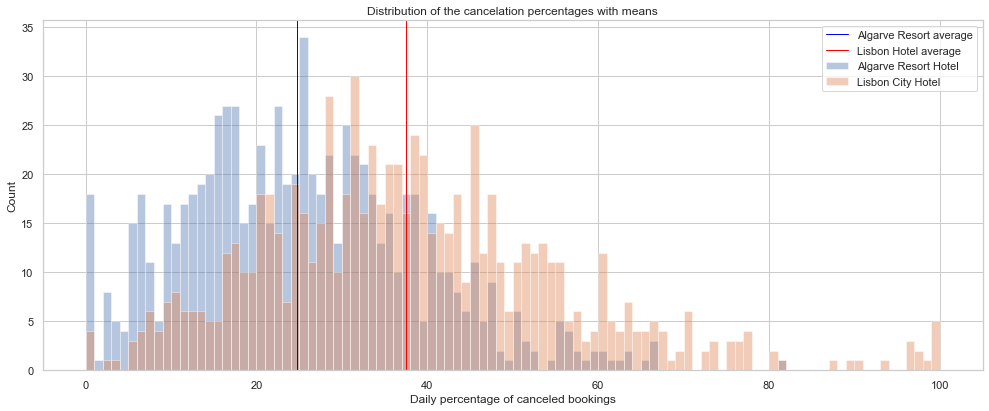

In [13]:
#Ploting the 2 distributions
daily_perc['Algarve Resort Hotel'].hist(bins = 82, alpha = 0.4, label = 'Algarve Resort Hotel')
daily_perc['Lisbon City Hotel'].hist(bins = 100, alpha = 0.4, label = 'Lisbon City Hotel')

#Ploting the means of the 2 distributions
plt.axvline(x=daily_perc['Algarve Resort Hotel'].mean(), color = 'blue', linewidth = 1, label = 'Algarve Resort average')
plt.axvline(x=daily_perc['Lisbon City Hotel'].mean(), color = 'red', linewidth = 1, label = 'Lisbon Hotel average')

plt.legend()
plt.xlabel('Daily percentage of canceled bookings')
plt.ylabel('Count')
plt.title('Distribution of the cancelation percentages with means')

> The differences are more visible now, with the Algarve Resort having more days with fewer cancelations percentages than the Lisbon Hotel.

### 2.4 Permutation test <a class="anchor" id="24"></a>

Since the data aren't normally distributed, we will be using a **non-parametric test**. This is simply a label for statistical tests used when the data aren't normally distributed. 

In [14]:
# First let's create a new column where we will store a permutaion of the is_canceled values.
test_data['Permutation'] = np.random.permutation(test_data.is_canceled)

# Now let's check the new distributions after permutations
test_data.groupby('hotel')['Permutation'].describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
Algarve Resort Hotel,793.0,31.817150,18.066463,0.0,19.0,30.0,41.0,100.0
Lisbon City Hotel,793.0,30.424968,15.894451,0.0,19.0,29.0,40.0,98.0


> After the permutation of the data we can see the mean of the 2 distributions are much closer to each other.

In [15]:
# Let's calculate the difference in mean between the 2 distributions before and after permutations

observed_diff = daily_perc['Lisbon City Hotel'].mean() - daily_perc['Algarve Resort Hotel'].mean() 
perm_diff = test_data.groupby('hotel')['Permutation'].describe().loc['Lisbon City Hotel', 'mean'] \
        - test_data.groupby('hotel')['Permutation'].describe().loc['Algarve Resort Hotel', 'mean']
print('Real difference is {} and difference after permutation of values is {}' \
      .format(round(observed_diff, 2), round(perm_diff, 2)))

Real difference is 12.66 and difference after permutation of values is -1.39


The difference in the means for Permutation **1.61** looks hugely different to our observed difference of **12.66**. 
It's starting to look like our observed difference is significant, and that the **Null Hypothesis is false**; the hotel does have an impact on cancelation rate.

But to be sure this is not just chance, let's create 1,000 permutations, calculate the mean of the permutation of the cancelation percentages and the difference between these for each one.

Let's create a vector with the differences - that will be the distibution of the Null.

In [16]:
difference = np.empty(1000)

Now let's make a **for** loop that does the following 1,000 times:
1. makes a permutation of the **is_canceled** as we did above
2. calculates the difference in the mean between the 2 hotels. 

In [17]:
for i in range(1000):
    test_data['Permutation_x'] = np.random.permutation(test_data.is_canceled)
    difference[i] = test_data.groupby('hotel')['Permutation_x'].describe().loc['Lisbon City Hotel', 'mean'] \
        - test_data.groupby('hotel')['Permutation_x'].describe().loc['Algarve Resort Hotel', 'mean']

> Now let's plot the distribution of mean difference after 1000 permutations and also let's plot the observed difference

Text(0.5, 1.0, 'Mean difference distribution for 1000 permutations compared to Observed difference')

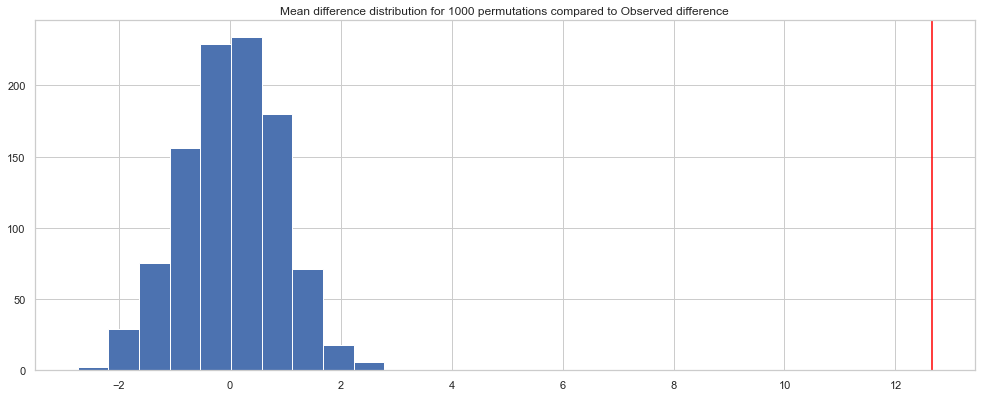

In [18]:
plt.hist(difference)
plt.axvline(x=observed_diff, color = 'red')
plt.title('Mean difference distribution for 1000 permutations compared to Observed difference')

> Finally, let's calculate the **p_value**

In [19]:
p_value = np.sum(difference >= observed_diff) / len(difference)
print('Test P_value = ', p_value)

Test P_value =  0.0


### 2.5 Hypothesis testing conclusion <a class="anchor" id="25"></a>

So the p-value of our observed data is 0. 
Actually, zero differences are at least as extreme as our observed difference!

It doesn't matter which significance level we pick; our observed data is statistically significant, and we reject the **Null Hypothesis**.

As somewhat expected, we conclude that hotels have an influence on the **is_canceled** target feature. So we will keep keep this for our predition modeling.

## 3. Feature analysis <a class="anchor" id="3"></a>

### 3.1 Heatmap <a class="anchor" id="31"></a>

<AxesSubplot:>

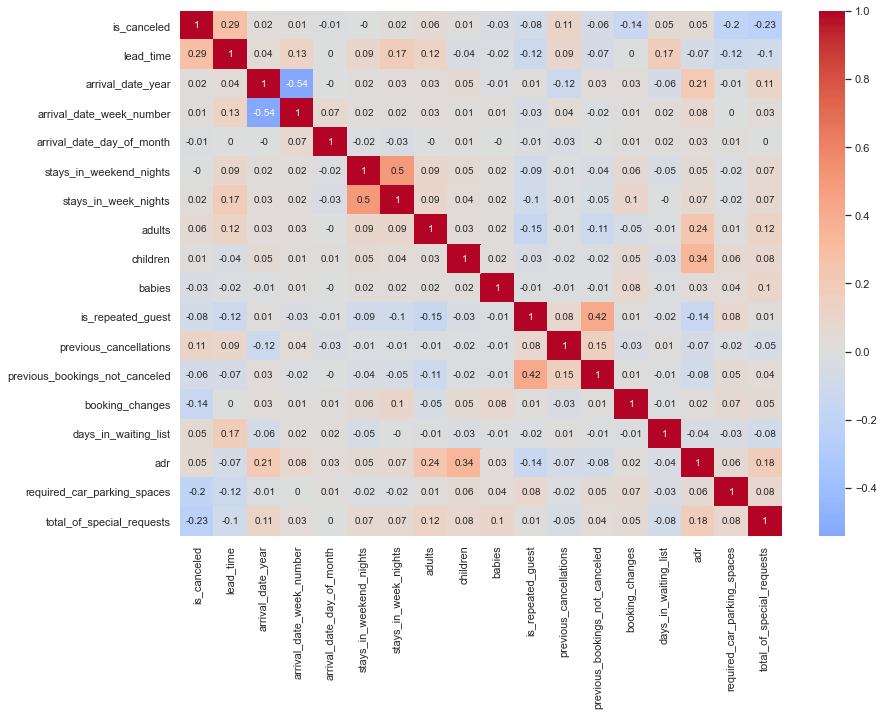

In [20]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(round(hotels.corr(), 2), center = 0, cmap="coolwarm", annot = True, annot_kws={'size': 10})

There are some notable correlations. Most of them are expected, such as:
- **arrival_date_year** and **arrival_date_week_number**, negativelly correlated because 2015 had the ending weeks, 2016 has all of them and 2017 has only the first weeks.
- **stays_in_weekend_night**s is highly correlated with **stays_in_week_nights**. Expected because for longer stays, as the number of days increase both these features will increase accordingly

Some other features are less correlated, and worth exploring. Such as:
- **is_canceled** positively correlated with **lead_time** and negatively correlated with **required_car_parking_spaces** and **total_of_special_requests**
- **adr** positively correlated with **arrival_date_year, adults** and **children**


### 3.2 Multivariate analysis  - Feature analysis versus canceled and confirmed subsets <a class="anchor" id="32"></a>

Let's explore the boxplots of **lead_time** for each hotels of canceled and confirmed bookings.

In [21]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

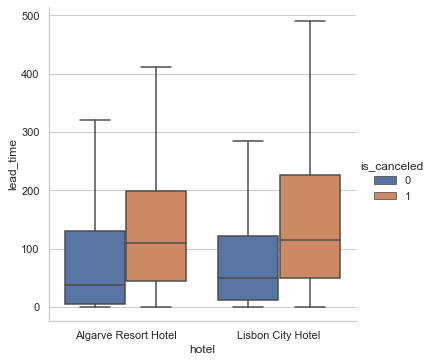

In [22]:
g = sns.catplot(x="hotel", y="lead_time", data=hotels, kind="box", hue = "is_canceled", showfliers = False)
plt.show()

> We can clearly see the correlation between cancelations and **lead_time**, regardless of the hotel.

Let's explore the correlation between **ADR** and **lead_time** and how this correlation changes in the canceled and confirmed bookings

Text(0.5, 1.2, 'Canceled bookings - ADR vs lead_time')

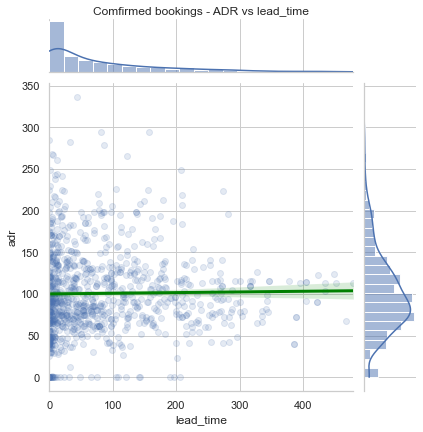

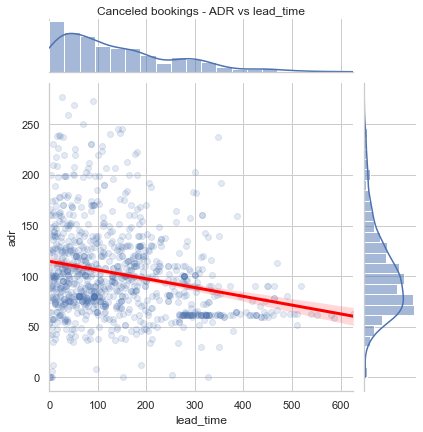

In [23]:
g_b = sns.jointplot(y='adr', x='lead_time', data=hotels[hotels.is_canceled == 0].sample(1000), kind = 'reg', scatter_kws={'alpha':0.15},
                    line_kws={'color': 'green', 'linewidth' : 3})
plt.title('Comfirmed bookings - ADR vs lead_time', y = 1.2)

g_c = sns.jointplot(y='adr', x='lead_time', data=hotels[hotels.is_canceled == 1].sample(1000), kind = 'reg', scatter_kws={'alpha':0.15},
                    line_kws={'color': 'red', 'linewidth' : 3})
plt.title('Canceled bookings - ADR vs lead_time', y = 1.2)

We can see a slight positive correlation for the confirmed bookings and a negative correlation for those who canceled.

Now let's explore the correlation between **ADR** and children and adults

Text(0.5, 1.0, 'Comfirmed bookings - ADR for bookings with children')

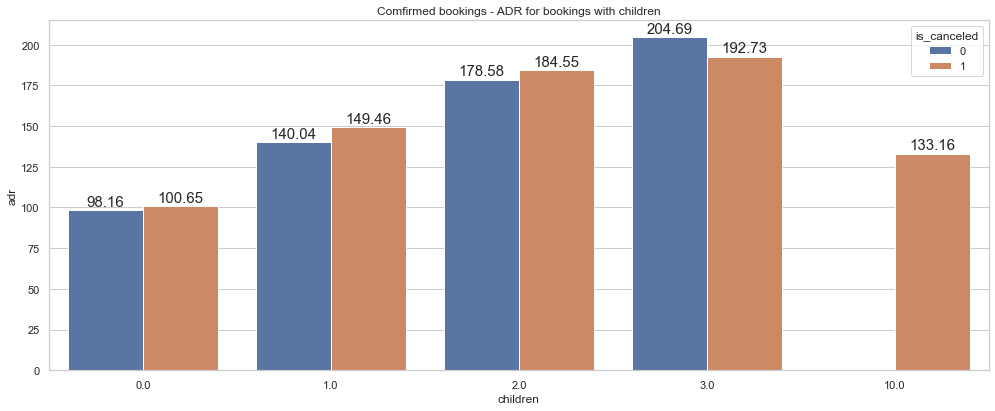

In [24]:
plots = sns.barplot(y='adr', x='children', data=hotels[hotels.adr > 0], hue = 'is_canceled', ci = None)
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Comfirmed bookings - ADR for bookings with children')

Text(0.5, 1.0, 'Comfirmed bookings - ADR for bookings with adults')

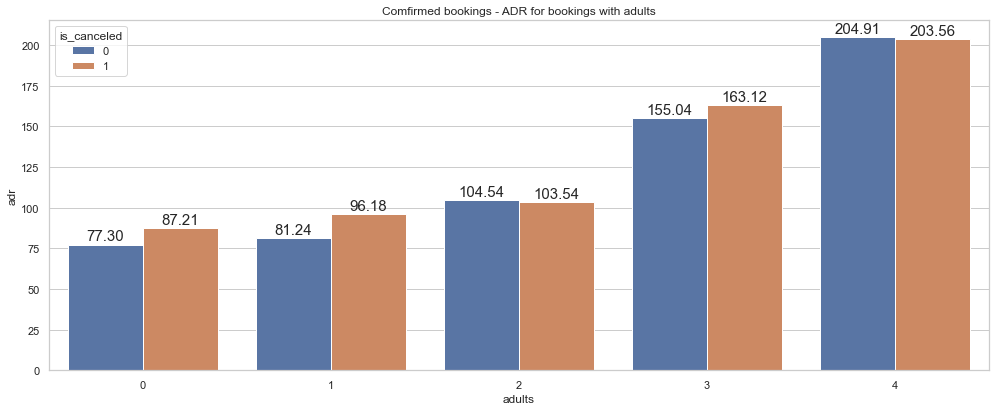

In [25]:
plots = sns.barplot(y='adr', x='adults', data=hotels[hotels.adr > 0], hue = 'is_canceled', ci = None)
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Comfirmed bookings - ADR for bookings with adults')

### 3.3 Temporal impact on bookings' ADR and lenght of stay <a class="anchor" id="33"></a>

Now let's analyze a sample of 1000 bookings and see if we find any intersting findings. We will have a look at:
 - week number on **x** axis and **year of arrival** as color -  for the temporal aspect
 - **total stay** - we will add the weekend nights with week nights - as points size
 - **adr** on **y** scale

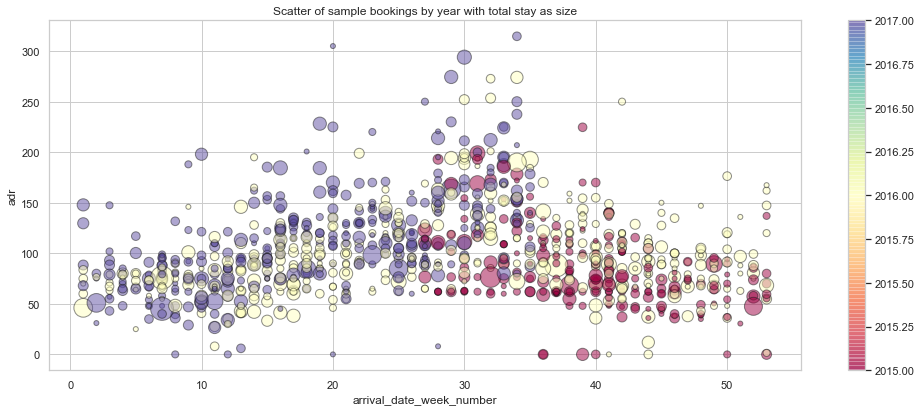

In [26]:
subset = hotels.sample(1000, random_state = 42)
area = (subset.stays_in_week_nights+subset.stays_in_weekend_nights)*25
color = subset.arrival_date_year

subset.plot.scatter(x ='arrival_date_week_number', y ='adr' ,
                     c = color, colormap=matplotlib.cm.get_cmap('Spectral'),
                     s = area, edgecolors = 'k',
                     sharex=False, figsize = (15,6), alpha = 0.5)
plt.title('Scatter of sample bookings by year with total stay as size')
plt.show()

> We can see the increased **adr** towards the summer months.
<br><br>Throughout the stays are starting to be for longer periods of time until after the 35th week(end of August), when the size of the stays begins to decrease.
<br>
<br> As we can see, in 2017 the bookings had constantly a higher **adr** and were generaly longer.

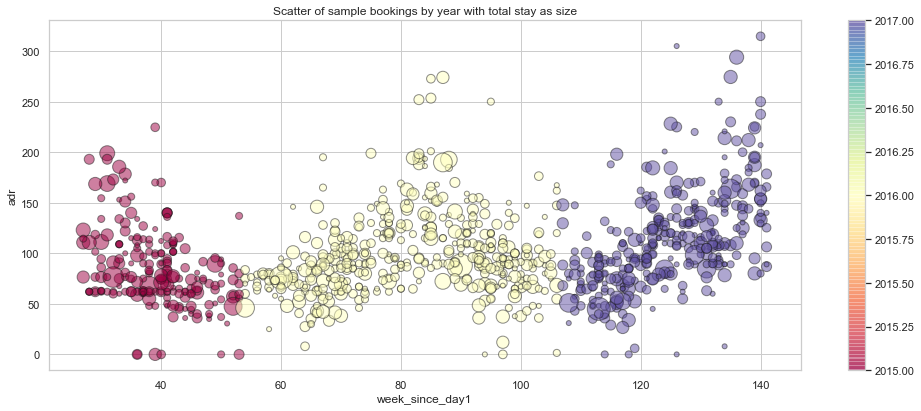

In [27]:
# Let's see the same graph spread on weeks from start until the end
for i, row in subset.iterrows():
    if subset.loc[i,'arrival_date_year'] == 2015:
        subset.loc[i, 'week_since_day1'] = subset.loc[i,'arrival_date_week_number']
    elif subset.loc[i,'arrival_date_year'] == 2016:
        subset.loc[i, 'week_since_day1'] = subset.loc[i,'arrival_date_week_number'] + 53
    else:
        subset.loc[i, 'week_since_day1'] = subset.loc[i,'arrival_date_week_number'] + 106
area = (subset.stays_in_week_nights+subset.stays_in_weekend_nights)*25
color = subset.arrival_date_year

subset.plot.scatter(x ='week_since_day1', y ='adr' ,
                     c = color, colormap=matplotlib.cm.get_cmap('Spectral'),
                     s = area, edgecolors = 'k',
                     sharex=False, figsize = (15,6), alpha = 0.5)
plt.title('Scatter of sample bookings by year with total stay as size')
plt.show()

## 4. Why most of the customers with non refundable deposits are canceling their bookings? <a class="anchor" id="4"></a>

In the previous exploration we found that most customers don't make any deposits, and out of them just 28.38% cancel their booking. A very small number of customers are making refundable deposits, with a percentage of cancelations of 22%. And there are more than 10000 customers who did a non-refundable deposit, and according to the describtion it was a full pay for their stay. The biggest surprise was that 99.36% customers from this last category ended up canceling their booking.

It goes against the normal expectations the fact that 99% of the customers that already paid in full for their stay, knowing that they will loose all that money if they will cancel, will still eventually cancel the booking. This is why we will continue exploring this situation, to see if we can identify what might have caused this.

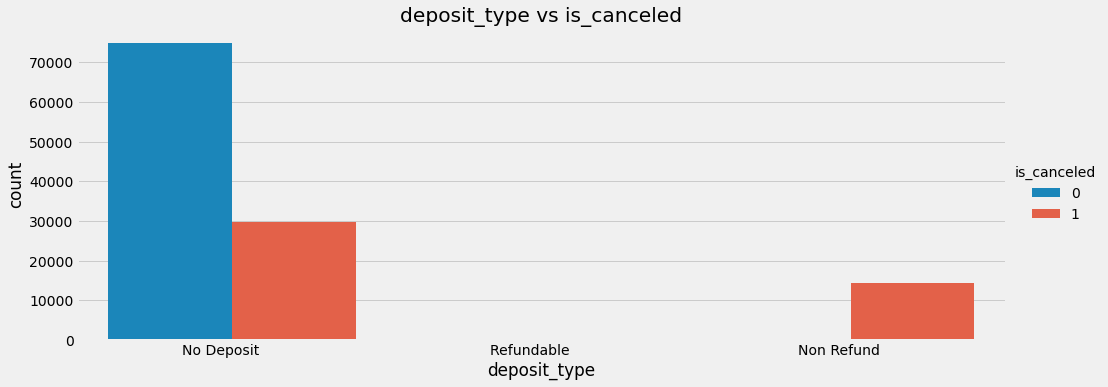

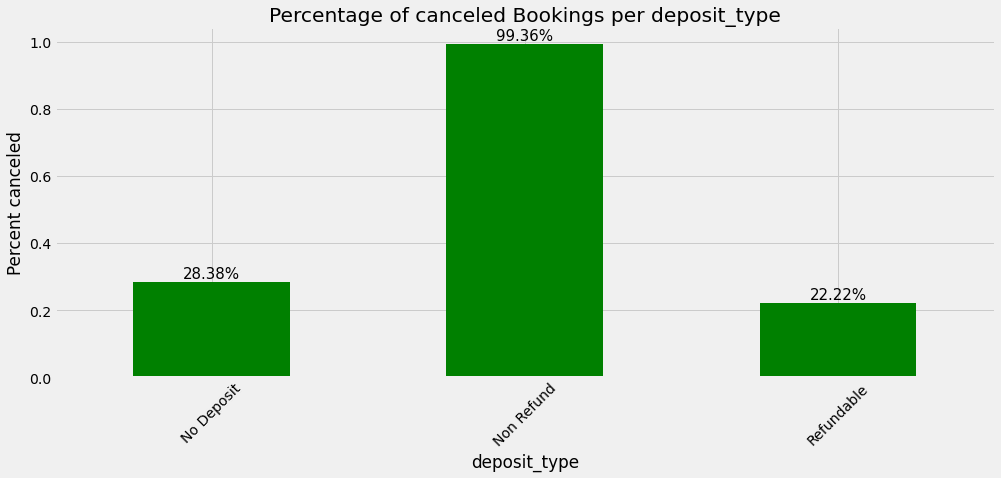

Let's see the count of each deposit type.

In [28]:
hotels.deposit_type.value_counts()

No Deposit         104641
Non Refund          14586
Refundable            162
Name: deposit_type, dtype: int64

In [29]:
hotels.deposit_type.unique()

array(['No Deposit     ', 'Refundable     ', 'Non Refund     '],
      dtype=object)

The values have some extra spaces that we need to take care of.

In [30]:
hotels.deposit_type = hotels.deposit_type.str.rstrip()
hotels.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [31]:
hotels[hotels.deposit_type == 'Non Refund'].describe(exclude=[np.number]).T

,count,unique,top,freq
hotel,14586,2,Lisbon City Hotel,12867
arrival_date_month,14586,12,September,1953
meal,14586,5,BB,12432
country,14586,13,PRT,14175
market_segment,14586,5,Groups,9172
distribution_channel,14586,3,TA/TO,13650
reserved_room_type,14586,8,A,14259
assigned_room_type,14586,9,A,14175
deposit_type,14586,1,Non Refund,14586
agent,14586,6,Other,7789


>Cheching the categorical values in the **Non Refundable** subset, we can't identify any causing feature that might have cause the 99% cancelations in the subset.

We will continue exploring the numerical features.

In [32]:
hotels[hotels.deposit_type == 'Non Refund'].describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,14586.0,0.993624,0.079597,0.0,1.0,1.0,1.0,1.0
lead_time,14586.0,212.921089,133.320833,0.0,103.0,183.0,304.0,629.0
arrival_date_year,14586.0,2016.031469,0.730292,2015.0,2015.0,2016.0,2017.0,2017.0
arrival_date_week_number,14586.0,27.449609,13.331638,1.0,17.0,25.0,39.0,53.0
arrival_date_day_of_month,14586.0,15.594817,8.699506,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,14586.0,0.621761,0.819553,0.0,0.0,0.0,1.0,7.0
stays_in_week_nights,14586.0,2.091183,1.152325,0.0,1.0,2.0,3.0,16.0
adults,14586.0,1.811394,0.394003,1.0,2.0,2.0,2.0,3.0
children,14586.0,0.000617,0.032064,0.0,0.0,0.0,0.0,2.0
babies,14586.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


> Apart from the fact that none of the booking have any babies in it, nothing else seems a clear reason for this high cancelation rate.

>We will check the correlation heatmap for this subset and see it there any major differences from the one of the whole dataframe.

Text(0.5, 1.0, 'Heatmap of subset containing Non-refundable bookings')

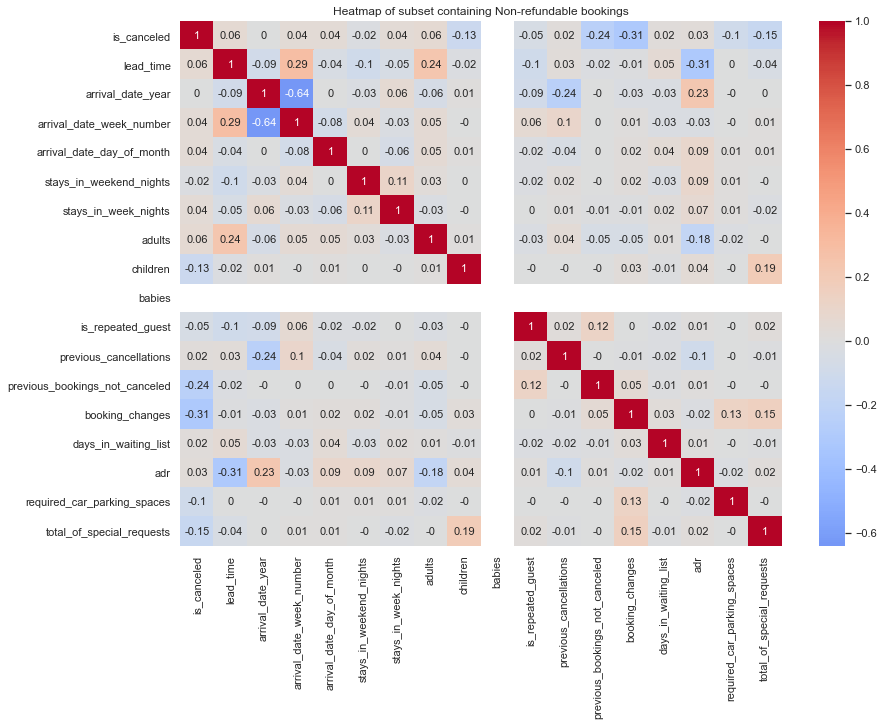

In [33]:
subset = hotels[hotels.deposit_type == 'Non Refund']
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(round(subset.corr(), 2), center = 0, cmap="coolwarm", annot = True, annot_kws={'size': 11})
plt.title('Heatmap of subset containing Non-refundable bookings')

Text(0.5, 1.0, 'Difference between correlation of non-refundable Bookings and all Bookings')

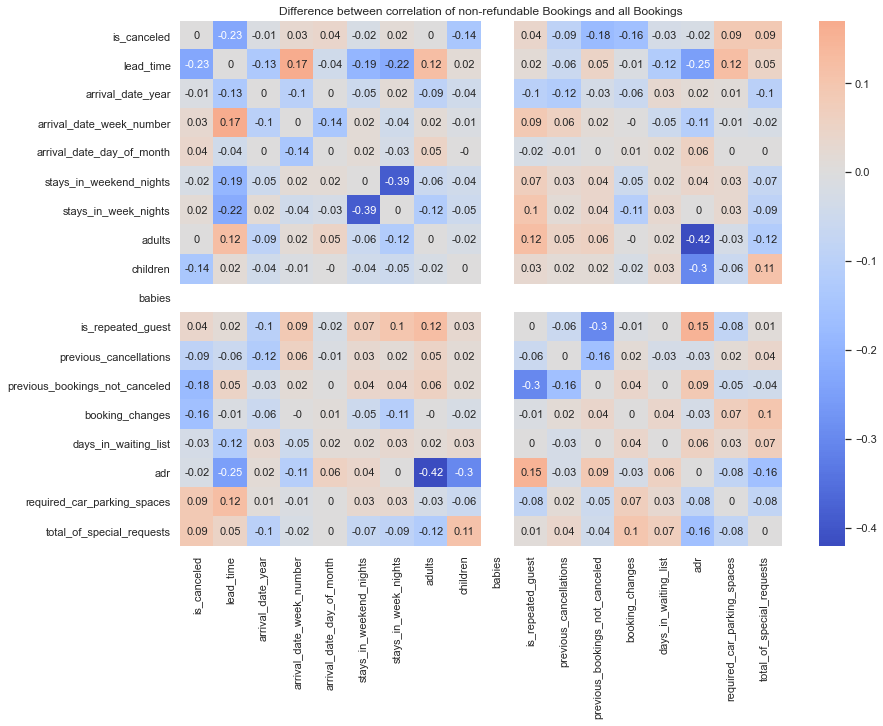

In [34]:
subset = hotels[hotels.deposit_type == 'Non Refund']
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(round(subset.corr() - hotels.corr(), 2), center = 0, cmap="coolwarm", annot = True, annot_kws={'size': 11})
plt.title('Difference between correlation of non-refundable Bookings and all Bookings')

>Compared to the main dataframe, there are a few higher correlation, mostly negative. We are mainly looking after high positive or negative correlations differences between our target feature, **is_canceled** and any other feature.
<br>
<br> Let's explore some of the features with the high correlations.

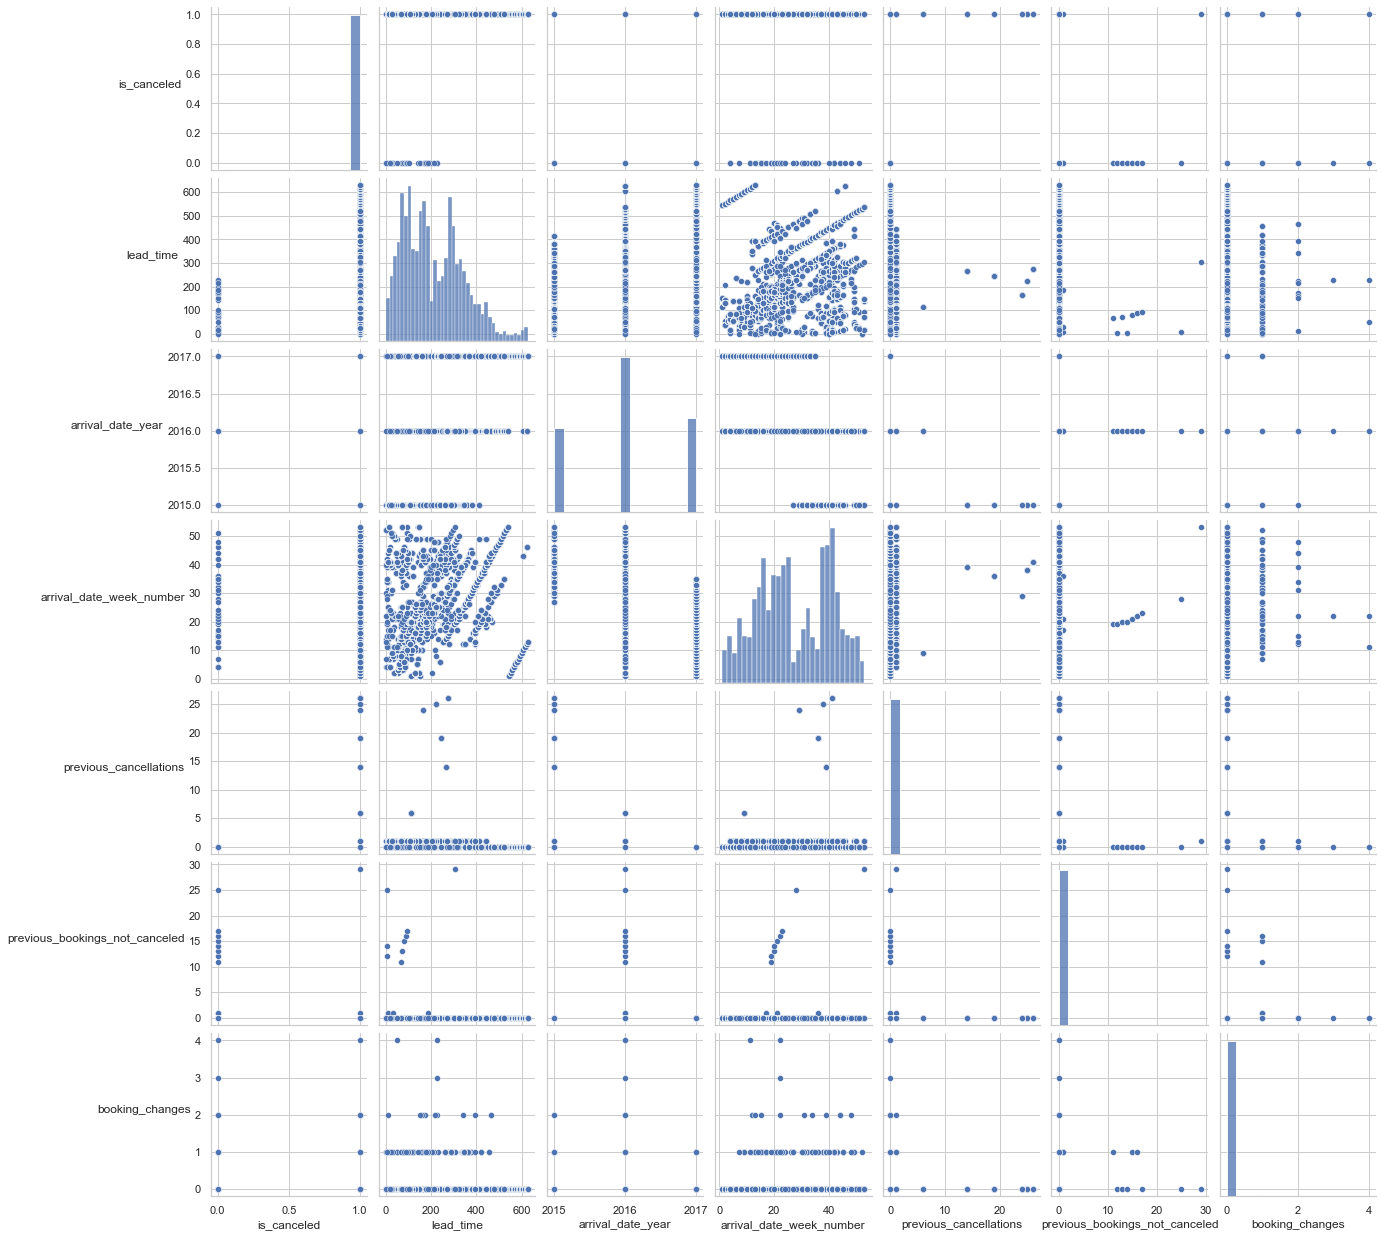

In [35]:
g = sns.pairplot(hotels[hotels.deposit_type == 'Non Refund'].loc[:, ['is_canceled', 'lead_time', 'arrival_date_year',
                                                             'arrival_date_week_number', 'previous_cancellations',
                                                             'previous_bookings_not_canceled', 'booking_changes']])
for axes in g.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
    axes.set_xlabel(axes.get_xlabel(), rotation=0)
plt.show()

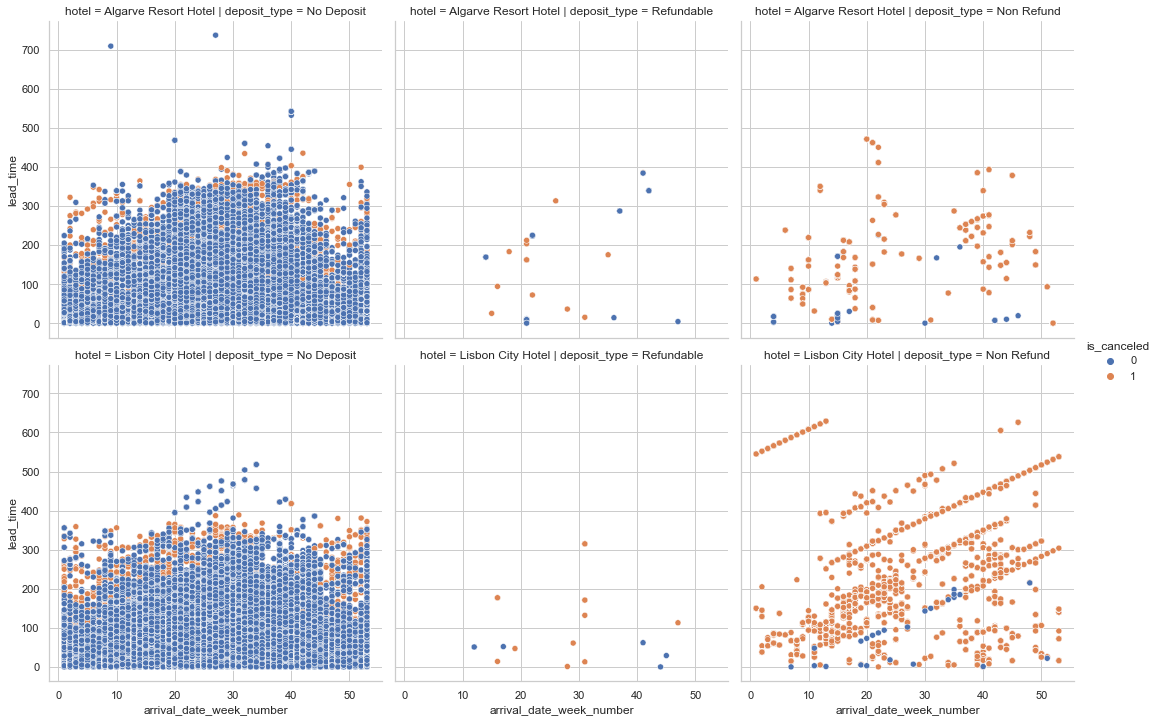

In [38]:
sns.relplot(data = hotels, y = 'lead_time', x = 'arrival_date_week_number',
            kind = 'scatter', hue = 'is_canceled', col = 'deposit_type', row = 'hotel')

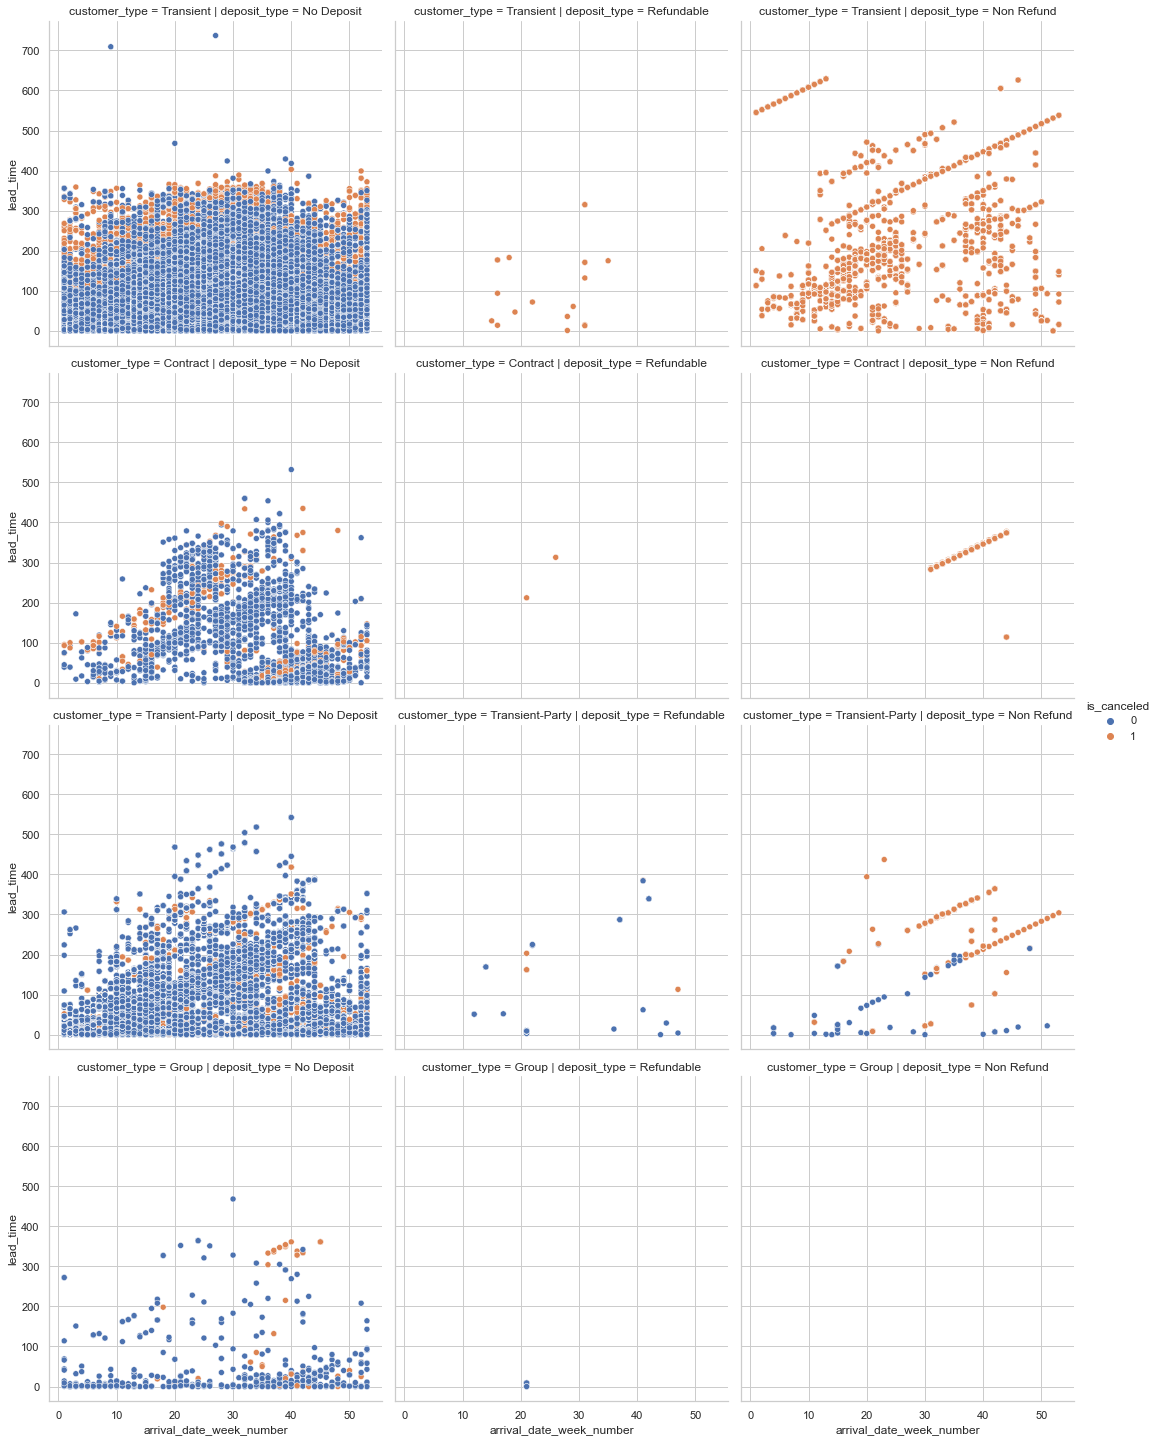

In [47]:
sns.relplot(data = hotels, x = 'arrival_date_week_number', y = 'lead_time',
            kind = 'scatter', col = 'deposit_type', hue = 'is_canceled', row = 'customer_type')

> None of these values and correlations are not reasons enough to explain this extremely high cancelations rate in the subset.

> To conclude, the data we have does not contain are reasonable explanation for the fact that 99.36% of the customers who paid in full with a non-refundable deposit ended up canceling their booking. A next step would be to verify the acuracy of the description of the **deposit** feature with hotel's management.

## 5. Conclusions <a class="anchor" id="5"></a>

During our Exploratory Data Analysis we were able to see that the records from the 2 hotels have distinct characteristics regarding cancelations. There are other features that are correlated with cancelations and we some others that were expected to be correlated.

We did some investigation to determine if there are specific cause for the high cancelations rate in the segment of customers that had a **non refundable** deposit. We came to the conclusion that is either a company policy that caused this extremely high percentage or an error in feature description.

Moving forward to the **Pre-processing and data training development** that includes our feature engineering we want to use the information we have to conduct a unsupervised learning algorithm to create a customer segmentation and them continue with our pre-processing and features engineering steps.